## Hydrogen Line Astronomy Introduction

21 centimeter radiation arises as a consequence whenever new stars are pro- duced. Every time that a star-forming event occurs, the more massive newborn stars produce large amounts of ultraviolet radiation: radiation that’s energetic enough to ionize hydrogen atoms. All of a sudden, space that was once filled with neutral hydrogen atoms is now filled with free protons and free electrons.
But those electrons are going to eventually be captured, once again, by those protons, and when there’s no longer enough ultraviolet radiation to ionize them over and over again, the electrons will once again sink down to the ground state, where they’ll have a 50/50 chance of being aligned or anti-aligned with the spin of the atomic nucleus.
Again, that same radiation — of 21 centimeters in wavelength — gets produced, and every time we measure that 21 centimeter wavelength localized in a specific region of space, even if it gets redshifted by the expansion of the Universe, what we’re seeing is evidence of recent star-formation. Wherever star-formation occurs, hydrogen gets ionized, and whenever those atoms become neutral and de-excite again, this specific-wavelength radiation persists for tens of millions of years.


# Gaussian Fit for Spectral Lines

We will use synthetic spectra available for different spectrums of different distance intervals within that is a Hydrogen 21 cm line at a Doppler velocity. We fit for the Doppler velocity of the 21 cm line for each distance. To do so, we fit a gaussian to the spectral line and determine the central frequency. We Use the displacement from the expected value to find the velocity. Once all lines are done, plot the velocities as a function of distance from the centre of our galaxy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tarfile
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from scipy.optimize import curve_fit

In [3]:
hline = tarfile.open("galaxy_21cm_spectrum.tar.xz", "r:xz")  #unzipping the tar file
hline.extractall()

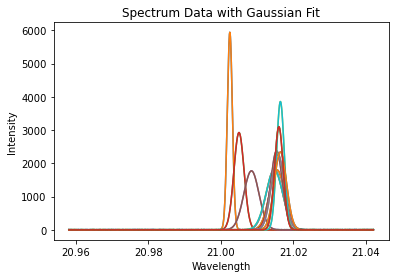

In [7]:
# Speed of light in meters per second
c = 3e10

# Define the Gaussian function with parameters a, mu, and sigma
def gaussian(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Create empty lists to store distances and velocities
distances = []
velocities = []

# Iterate through the file names to process spectrum data files
for file_name in hline.getnames():
    # Check if the file name ends with ".txt" and contains "spectrum_d" in the name
    if file_name.endswith(".txt") and "spectrum_d" in file_name:
        # Extract the distance from the file name
        distance = float(file_name.split("spectrum_d_")[1].split("_kpc")[0])
        distances.append(distance)
        
        # Read data from the file
        with open(file_name, "r") as file:
            data = np.loadtxt(file, dtype=None, skiprows=1)
        wavelength = data[:, 0]
        intensity = data[:, 1]
        
        # Initial guess for the Gaussian fit parameters (a, mu, sigma)
        p0 = [800, 21, 1]
        
        # Perform curve fitting using the Gaussian function to fit the data
        popt, pcov = curve_fit(gaussian, wavelength, intensity, p0)
        
        # Plot the original spectrum data and the Gaussian fit
        plt.plot(wavelength, intensity, label="Original Data")
        plt.plot(wavelength, gaussian(wavelength, *popt), label="Gaussian Fit")
        
        # Calculate the central wavelength (peak wavelength of the Gaussian) and the velocity
        central_wavelength = popt[1]
        velocity = ((central_wavelength - 21) / 21) * c
        velocities.append(velocity)

# Add labels and legend to the plot
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Spectrum Data with Gaussian Fit')

# Display the plot
plt.show()

# Galaxy Rotation Curve

The galaxy rotation curve is a graph representing the rotation speed of stars or gas in a galaxy as a function of their distance from the center. In most galaxies, including spiral galaxies like our Milky Way, the rotation curve shows unexpected behavior. According to Newtonian mechanics, the rotation speed should decrease with increasing distance from the center due to the decrease in gravitational attraction from the enclosed mass. However, observations reveal that the rotation speed remains roughly constant at large distances from the galactic center, defying expectations and forming a flat plateau. This discrepancy suggests the presence of significant amounts of unseen dark matter, exerting additional gravitational forces and stabilizing the rotation curve. The galaxy rotation curve has been a crucial piece of evidence supporting the existence of dark matter, an elusive and invisible form of matter that constitutes a substantial portion of the universe's mass and plays a fundamental role in shaping the large-scale structure of the cosmos.

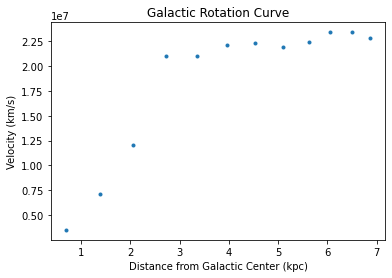

In [8]:
plt.plot(distances, velocities, '.')
plt.xlabel("Distance from Galactic Center (kpc)")
plt.ylabel("Velocity (km/s)")
plt.title("Galactic Rotation Curve")
plt.show()  